In [1]:
from autogluon.tabular import TabularDataset, TabularPredictor
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN

In [2]:
data_1 = TabularDataset('..\dataset\Dataset_AutoML.csv').drop(['Sequence'],axis=1)
#data=data.drop(['Anti_Sa'], axis=1)
data_1.head()

,Length,Hydrophobic residue%,Hp,Ep,miuH,H,Normalized Hydrophobic Moment,Normalized Hydrophobicity,Net Charge,Isoelectric Point,...,Tiny_Mole.,Small_Mole.,Aliphatic_Mole.,Aromatic_Mole.,NonPolar_Mole.,Polar_Mole.,Charged_Mole.,Basic_Mole.,Acidic_Mole.,Label
0,15,0.333,0.333,0.333,0.180164,0.267333,0.46,0.81,4,11.85,...,33.333,40.000,20.000,20.000,53.333,46.667,33.333,33.333,0.000,2
1,16,0.688,0.188,0.562,0.526107,0.426250,1.28,-0.34,5,11.28,...,31.250,37.500,56.250,6.250,62.500,37.500,31.250,31.250,0.000,1
2,13,0.538,0.231,0.615,0.846486,0.315385,2.61,0.44,4,11.87,...,0.000,15.385,30.769,15.385,46.154,53.846,46.154,38.462,7.692,2
3,12,0.500,0.083,0.333,0.782014,0.192500,2.61,0.71,4,11.87,...,0.000,16.667,33.333,8.333,41.667,58.333,50.000,41.667,8.333,2
4,17,0.529,0.176,0.294,0.771108,0.377647,2.36,0.09,4,11.88,...,5.882,29.412,35.294,11.765,52.941,47.059,35.294,29.412,5.882,2


# BorderlineSMOTE

In [3]:
Feature=pd.DataFrame(data_1.drop(['Label'], axis=1))
Lab=data_1['Label']
Lab=pd.DataFrame(Lab)

In [4]:
smo = BorderlineSMOTE(random_state=42)
x_smo, y_smo = smo.fit_resample(Feature,Lab)
x_smo=pd.DataFrame(x_smo)
smo=pd.merge(x_smo,y_smo,left_index=True, right_index=True)
smo

,Length,Hydrophobic residue%,Hp,Ep,miuH,H,Normalized Hydrophobic Moment,Normalized Hydrophobicity,Net Charge,Isoelectric Point,...,Tiny_Mole.,Small_Mole.,Aliphatic_Mole.,Aromatic_Mole.,NonPolar_Mole.,Polar_Mole.,Charged_Mole.,Basic_Mole.,Acidic_Mole.,Label
0,15,0.333000,0.333000,0.333000,0.180164,0.267333,0.460000,0.810000,4,11.850000,...,33.333000,40.000000,20.000000,20.000000,53.333000,46.667000,33.333000,33.333000,0.000000,2
1,16,0.688000,0.188000,0.562000,0.526107,0.426250,1.280000,-0.340000,5,11.280000,...,31.250000,37.500000,56.250000,6.250000,62.500000,37.500000,31.250000,31.250000,0.000000,1
2,13,0.538000,0.231000,0.615000,0.846486,0.315385,2.610000,0.440000,4,11.870000,...,0.000000,15.385000,30.769000,15.385000,46.154000,53.846000,46.154000,38.462000,7.692000,2
3,12,0.500000,0.083000,0.333000,0.782014,0.192500,2.610000,0.710000,4,11.870000,...,0.000000,16.667000,33.333000,8.333000,41.667000,58.333000,50.000000,41.667000,8.333000,2
4,17,0.529000,0.176000,0.294000,0.771108,0.377647,2.360000,0.090000,4,11.880000,...,5.882000,29.412000,35.294000,11.765000,52.941000,47.059000,35.294000,29.412000,5.882000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2128,13,0.251248,0.284921,0.193274,0.433728,0.017508,1.075474,1.715166,3,10.966548,...,16.914110,25.123816,16.914110,5.307890,27.529890,72.470110,35.739596,30.431706,5.307890,3
2129,11,0.636000,0.674281,0.280543,0.643604,0.542304,1.996631,-1.203528,1,10.663687,...,35.610435,54.545000,53.791518,0.753565,71.973435,28.026565,18.935565,18.182000,0.753565,3
2130,10,0.642475,0.270912,0.407351,0.759082,0.566636,2.285107,-0.775674,0,8.199118,...,16.754523,37.994461,41.622710,13.126746,64.248010,35.751990,32.123741,18.997467,13.126746,3
2131,13,0.735402,0.077000,0.548241,0.579371,0.711779,1.744363,-1.391646,2,10.707453,...,30.769000,49.510295,53.846000,12.028268,76.923000,23.077000,15.385000,15.385000,0.000000,3


In [5]:
data=smo

# AutoGluon

In [6]:
train_data,test_data=train_test_split(data, test_size=0.2,random_state=0)
train_data.head()

,Length,Hydrophobic residue%,Hp,Ep,miuH,H,Normalized Hydrophobic Moment,Normalized Hydrophobicity,Net Charge,Isoelectric Point,...,Tiny_Mole.,Small_Mole.,Aliphatic_Mole.,Aromatic_Mole.,NonPolar_Mole.,Polar_Mole.,Charged_Mole.,Basic_Mole.,Acidic_Mole.,Label
1018,17,0.471,0.529,0.529,0.492396,0.392353,1.63,-0.22,0,5.69,...,35.294,64.706,41.176,0.000,58.824,41.176,11.765,5.882,5.882,2
634,12,0.667,0.667,0.250,0.432947,0.515000,1.28,-0.22,5,12.58,...,0.000,25.000,50.000,8.333,58.333,41.667,41.667,41.667,0.000,1
486,13,0.231,0.077,0.615,0.422325,0.080000,1.51,2.05,6,12.80,...,0.000,38.462,15.385,0.000,53.846,46.154,46.154,46.154,0.000,3
1344,16,0.375,0.688,0.188,0.557431,0.007500,1.56,1.62,5,12.13,...,25.000,50.000,18.750,12.500,43.750,56.250,43.750,37.500,6.250,1
521,11,0.636,0.636,0.364,0.488118,0.790000,1.95,-0.37,3,11.10,...,9.091,18.182,36.364,18.182,72.727,27.273,27.273,27.273,0.000,2


In [7]:
label='Label'
print("Summary of antisa activity coulum: \n", train_data['Label'].describe())
print("Summary of antisa activity coulum: \n", test_data['Label'].describe())

Summary of antisa activity coulum: 
 count    1706.000000
mean        1.991794
std         0.813336
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: Label, dtype: float64
Summary of antisa activity coulum: 
 count    427.000000
mean       2.032787
std        0.830098
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: Label, dtype: float64


In [8]:
save_path = 'anticp'
predictor = TabularPredictor(label=label, path=save_path).fit(train_data, num_bag_folds=10, num_bag_sets=1, num_stack_levels=1, presets='best_quality')
results = predictor.fit_summary()

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.8.10
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
CPU Count:          8
Memory Avail:       1.49 GB / 15.78 GB (9.4%)
Disk Space Avail:   171.01 GB / 475.83 GB (35.9%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=10, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Then holdout validation data is used to detect stacked overfitting.
	Running DyStack for up t

(autoscaler +55s) Tip: use `ray status` to view detailed cluster status. To disable these messages, set RAY_SCHEDULER_EVENTS=0.
(autoscaler +55s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.
(autoscaler +1m30s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.
(autoscaler +2m6s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=26552) 	0.7177	 = Validation score   (accuracy)
(_dystack pid=26552) 	109.9s	 = Training   runtime
(_dystack pid=26552) 	0.72s	 = Validation runtime
(_dystack pid=26552) Fitting model: LightGBMXT_BAG_L1 ... Training model for up to 432.35s of the 723.84s of remaining time.
(_dystack pid=26552) 	Fitting 10 child models (S1F1 - S1F10) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=1, gpus=0, memory=0.80%)


(autoscaler +3m2s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.
(autoscaler +3m38s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.
(autoscaler +4m14s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=26552) 	0.7335	 = Validation score   (accuracy)
(_dystack pid=26552) 	171.37s	 = Training   runtime
(_dystack pid=26552) 	1.17s	 = Validation runtime
(_dystack pid=26552) Fitting model: LightGBM_BAG_L1 ... Training model for up to 233.87s of the 525.36s of remaining time.
(_dystack pid=26552) 	Fitting 10 child models (S1F1 - S1F10) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=1, gpus=0, memory=0.88%)


(autoscaler +6m22s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.
(autoscaler +6m57s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.
(autoscaler +7m33s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.
(autoscaler +8m9s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=26552) 	0.7289	 = Validation score   (accuracy)
(_dystack pid=26552) 	189.9s	 = Training   runtime
(_dystack pid=26552) 	1.16s	 = Validation runtime
(_dystack pid=26552) Fitting model: RandomForestGini_BAG_L1 ... Training model for up to 7.07s of the 298.55s of remaining time.
(_dystack pid=26552) 	Warning: Reducing model 'n_estimators' from 300 -> 249 due to low time. Expected time usage reduced from 8.4s -> 7.1s...
(_dystack pid=26552) 	0.6953	 = Validation score   (accuracy)
(_dystack pid=26552) 	4.03s	 = Training   runtime
(_dystack pid=26552) 	0.72s	 = Validation runtime
(_dystack pid=26552) Fitting model: RandomForestEntr_BAG_L1 ... Training model for up to 2.13s of the 293.62s of remaining time.
(_dystack pid=26552) 	Warning: Reducing model 'n_estimators' from 300 -> 44 due to low time. Expected time usage reduced from 13.9s -> 2.1s...
(_dystack pid=26552) 	0.6695	 = Validation score   (accuracy)
(_dystack pid=26552) 	1.18s	 = Training   runtime
(_dystack pid=26552

(autoscaler +10m12s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.
(autoscaler +10m48s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=26552) 	Time limit exceeded... Skipping CatBoost_BAG_L1.
(_ray_fit pid=20108) Traceback (most recent call last):
(_ray_fit pid=20108)   File "python\ray\_raylet.pyx", line 1883, in ray._raylet.execute_task
(_ray_fit pid=20108)   File "python\ray\_raylet.pyx", line 1984, in ray._raylet.execute_task
(_ray_fit pid=20108)   File "python\ray\_raylet.pyx", line 1889, in ray._raylet.execute_task
(_ray_fit pid=20108)   File "C:\Users\harel\PycharmProjects\Anti_Cp\venv38\lib\site-packages\autogluon\core\models\ensemble\fold_fitting_strategy.py", line 402, in _ray_fit
(_ray_fit pid=20108)     fold_model.fit(X=X_fold, y=y_fold, X_val=X_val_fold, y_val=y_val_fold, time_limit=time_limit_fold, **resources, **kwargs_fold)
(_ray_fit pid=20108)   File "C:\Users\harel\PycharmProjects\Anti_Cp\venv38\lib\site-packages\autogluon\core\models\abstract\abstract_model.py", line 856, in fit
(_ray_fit pid=20108)     out = self._fit(**kwargs)
(_ray_fit pid=20108)   File "C:\Users\harel\PycharmProjec

(autoscaler +11m23s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.
(autoscaler +12m0s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=26552) 	0.7678	 = Validation score   (accuracy)
(_dystack pid=26552) 	92.97s	 = Training   runtime
(_dystack pid=26552) 	0.57s	 = Validation runtime
(_dystack pid=26552)   File "python\ray\_raylet.pyx", line 1889, in ray._raylet.execute_task
(_dystack pid=26552)   File "C:\Users\harel\PycharmProjects\Anti_Cp\venv38\lib\site-packages\autogluon\core\models\ensemble\fold_fitting_strategy.py", line 402, in _ray_fit
(_dystack pid=26552)     fold_model.fit(X=X_fold, y=y_fold, X_val=X_val_fold, y_val=y_val_fold, time_limit=time_limit_fold, **resources, **kwargs_fold)
(_dystack pid=26552)   File "C:\Users\harel\PycharmProjects\Anti_Cp\venv38\lib\site-packages\autogluon\core\models\abstract\abstract_model.py", line 856, in fit
(_dystack pid=26552)     out = self._fit(**kwargs)
(_dystack pid=26552)   File "C:\Users\harel\PycharmProjects\Anti_Cp\venv38\lib\site-packages\autogluon\tabular\models\catboost\catboost_model.py", line 197, in _fit
(_dystack pid=26552)     raise TimeLimitEx

(autoscaler +12m57s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.
(autoscaler +13m33s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.
(autoscaler +14m9s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=26552) 	0.7823	 = Validation score   (accuracy)
(_dystack pid=26552) 	82.78s	 = Training   runtime
(_dystack pid=26552) 	0.21s	 = Validation runtime
(_dystack pid=26552) Fitting model: WeightedEnsemble_L3 ... Training model for up to 360.0s of the -0.78s of remaining time.
(_dystack pid=26552) 	Ensemble Weights: {'LightGBMXT_BAG_L2': 1.0}
(_dystack pid=26552) 	0.7823	 = Validation score   (accuracy)
(_dystack pid=26552) 	0.47s	 = Training   runtime
(_dystack pid=26552) 	0.0s	 = Validation runtime
(_dystack pid=26552) AutoGluon training complete, total runtime = 875.69s ... Best model: WeightedEnsemble_L3 | Estimated inference throughput: 41.3 rows/s (152 batch size)
(_dystack pid=26552) TabularPredictor saved. To load, use: predictor = TabularPredictor.load("anticp\ds_sub_fit\sub_fit_ho")
(_dystack pid=26552) Deleting DyStack predictor artifacts (clean_up_fits=True) ...
Leaderboard on holdout data (DyStack):
                      model  score_holdout  score_val eval_metri

*** Summary of fit() ***
Estimated performance of each model:
                      model  score_val eval_metric  pred_time_val     fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0           LightGBM_BAG_L2   0.772567    accuracy       7.173082  1823.998285                0.797276         228.529986            2       True         16
1       WeightedEnsemble_L3   0.772567    accuracy       7.175098  1825.444184                0.002016           1.445899            3       True         20
2         LightGBMXT_BAG_L2   0.769050    accuracy       6.786234  1721.417059                0.410428         125.948760            2       True         15
3           CatBoost_BAG_L2   0.767878    accuracy       6.551301  1781.431284                0.175494         185.962985            2       True         19
4    NeuralNetFastAI_BAG_L2   0.760844    accuracy       7.166940  1739.476796                0.791134         144.008497            2       True        

C:\Users\harel\PycharmProjects\Anti_Cp\venv38\lib\site-packages\autogluon\core\utils\plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


In [9]:
y_test = test_data[label]
test_data_nolab= test_data.drop(columns=[label])
test_data_nolab.head()

,Length,Hydrophobic residue%,Hp,Ep,miuH,H,Normalized Hydrophobic Moment,Normalized Hydrophobicity,Net Charge,Isoelectric Point,...,MSWHIM3,Tiny_Mole.,Small_Mole.,Aliphatic_Mole.,Aromatic_Mole.,NonPolar_Mole.,Polar_Mole.,Charged_Mole.,Basic_Mole.,Acidic_Mole.
1968,12,0.580472,0.090616,0.412766,0.369876,0.511615,0.640159,0.051219,3,10.982689,...,-0.194335,16.836223,24.915373,41.751596,16.328524,58.248404,41.751596,33.502253,33.333,0.169253
379,15,0.533000,0.600000,0.533000,0.319952,0.597333,1.030000,-0.240000,3,11.560000,...,-0.226667,13.333000,33.333000,26.667000,20.000000,60.000000,40.000000,20.000000,20.000,0.000000
689,12,0.833000,0.083000,0.583000,0.293332,0.720000,1.090000,-1.110000,3,11.800000,...,-0.101667,25.000000,50.000000,58.333000,8.333000,75.000000,25.000000,25.000000,25.000,0.000000
935,13,0.615000,0.692000,0.231000,0.099480,0.663077,0.180000,0.640000,5,12.180000,...,0.050769,7.692000,7.692000,30.769000,23.077000,53.846000,46.154000,38.462000,38.462,0.000000
252,18,0.278000,0.222000,0.444000,0.370852,-0.024444,1.080000,1.420000,-2,3.980000,...,-0.401111,22.222000,50.000000,5.556000,16.667000,44.444000,55.556000,44.444000,16.667,27.778000


In [10]:
predictor=TabularPredictor.load(save_path)

y_pred = predictor.predict(test_data_nolab)
print("Predictions: \n", y_pred)
print("GT: \n", y_test)
performance = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

Predictions: 
 1968    3
379     1
689     2
935     1
252     3
       ..
666     2
459     3
596     3
376     1
1257    3
Name: Label, Length: 427, dtype: int64
GT: 
 1968    3
379     2
689     2
935     1
252     3
       ..
666     1
459     3
596     3
376     1
1257    3
Name: Label, Length: 427, dtype: int64


In [11]:
res_leaderboard=predictor.leaderboard(test_data,extra_metrics=['accuracy',
                                               'f1_macro','f1_micro',
                                               'roc_auc_ovo_macro',
                                               'precision_macro','precision_micro',
                                               'recall_macro','recall_micro'], silent=True)
res_leaderboard

,model,score_test,accuracy,f1_macro,f1_micro,roc_auc_ovo_macro,precision_macro,precision_micro,recall_macro,recall_micro,...,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,NeuralNetFastAI_BAG_L2,0.763466,0.763466,0.757816,0.763466,0.907543,0.757606,0.763466,0.759159,0.763466,...,accuracy,25.068736,7.166940,1739.476796,6.122221,0.791134,144.008497,2,True,14
1,WeightedEnsemble_L2,0.749415,0.749415,0.742489,0.749415,0.902404,0.743792,0.749415,0.744623,0.749415,...,accuracy,11.305153,4.014823,168.128396,0.016000,0.007999,0.997160,2,True,13
2,RandomForestEntr_BAG_L2,0.749415,0.749415,0.745391,0.749415,0.900135,0.745477,0.749415,0.745455,0.749415,...,accuracy,21.976151,7.220192,1602.955144,3.029637,0.844386,7.486845,2,True,18
3,LightGBM_BAG_L2,0.747073,0.747073,0.742227,0.747073,0.903638,0.742843,0.747073,0.743233,0.747073,...,accuracy,20.021704,7.173082,1823.998285,1.075190,0.797276,228.529986,2,True,16
4,WeightedEnsemble_L3,0.747073,0.747073,0.742227,0.747073,0.903638,0.742843,0.747073,0.743233,0.747073,...,accuracy,20.021704,7.175098,1825.444184,0.000000,0.002016,1.445899,3,True,20
5,RandomForestGini_BAG_L2,0.742389,0.742389,0.737789,0.742389,0.898855,0.738028,0.742389,0.738437,0.742389,...,accuracy,20.045121,7.391862,1602.450938,1.098607,1.016056,6.982639,2,True,17
6,CatBoost_BAG_L2,0.742389,0.742389,0.737582,0.742389,0.901394,0.737842,0.742389,0.738437,0.742389,...,accuracy,20.216186,6.551301,1781.431284,1.269671,0.175494,185.962985,2,True,19
7,LightGBMXT_BAG_L2,0.742389,0.742389,0.737270,0.742389,0.905135,0.737675,0.742389,0.738471,0.742389,...,accuracy,20.655211,6.786234,1721.417059,1.708697,0.410428,125.948760,2,True,15
8,ExtraTreesEntr_BAG_L1,0.735363,0.735363,0.728352,0.735363,0.892931,0.732255,0.735363,0.731112,0.735363,...,accuracy,1.211603,0.731426,3.559911,1.211603,0.731426,3.559911,1,True,10
9,CatBoost_BAG_L1,0.730679,0.730679,0.724692,0.730679,0.877002,0.726953,0.730679,0.726282,0.730679,...,accuracy,1.009999,0.144511,1025.166691,1.009999,0.144511,1025.166691,1,True,8


In [12]:
model_best=predictor.get_model_best()
model_best

C:\Users\harel\AppData\Local\Temp\ipykernel_28980\3413965928.py:1: DeprecationWarning: `get_model_best` has been deprecated and will be removed in version 1.2. Please use `model_best` instead. This will raise an error in the future!
  model_best=predictor.get_model_best()


'WeightedEnsemble_L3'

In [13]:
predictor.get_model_names()

C:\Users\harel\AppData\Local\Temp\ipykernel_28980\107866492.py:1: DeprecationWarning: `get_model_names` has been deprecated and will be removed in version 1.2. Please use `model_names` instead. This will raise an error in the future!
  predictor.get_model_names()


['KNeighborsUnif_BAG_L1',
 'KNeighborsDist_BAG_L1',
 'NeuralNetFastAI_BAG_L1',
 'LightGBMXT_BAG_L1',
 'LightGBM_BAG_L1',
 'RandomForestGini_BAG_L1',
 'RandomForestEntr_BAG_L1',
 'CatBoost_BAG_L1',
 'ExtraTreesGini_BAG_L1',
 'ExtraTreesEntr_BAG_L1',
 'XGBoost_BAG_L1',
 'LightGBMLarge_BAG_L1',
 'WeightedEnsemble_L2',
 'NeuralNetFastAI_BAG_L2',
 'LightGBMXT_BAG_L2',
 'LightGBM_BAG_L2',
 'RandomForestGini_BAG_L2',
 'RandomForestEntr_BAG_L2',
 'CatBoost_BAG_L2',
 'WeightedEnsemble_L3']

In [14]:
specific_model = predictor._trainer.load_model(model_best)
model_info = specific_model.get_info()
model_info

{'name': 'WeightedEnsemble_L3',
 'model_type': 'WeightedEnsembleModel',
 'problem_type': 'multiclass',
 'eval_metric': 'accuracy',
 'stopping_metric': 'accuracy',
 'fit_time': 1.4458985328674316,
 'num_classes': 3,
 'quantile_levels': None,
 'predict_time': 0.0020155906677246094,
 'val_score': 0.772567409144197,
 'hyperparameters': {'use_orig_features': False,
  'max_base_models': 25,
  'max_base_models_per_type': 5,
  'save_bag_folds': True},
 'hyperparameters_fit': {},
 'hyperparameters_nondefault': ['save_bag_folds'],
 'ag_args_fit': {'max_memory_usage_ratio': 1.0,
  'max_time_limit_ratio': 1.0,
  'max_time_limit': None,
  'min_time_limit': 0,
  'valid_raw_types': None,
  'valid_special_types': None,
  'ignored_type_group_special': None,
  'ignored_type_group_raw': None,
  'get_features_kwargs': None,
  'get_features_kwargs_extra': None,
  'predict_1_batch_size': None,
  'temperature_scalar': None,
  'drop_unique': False},
 'num_features': 3,
 'features': ['LightGBM_BAG_L2_1', 'Ligh

In [16]:
'a'

'a'

In [17]:
model_pred=predictor.predict(test_data_nolab,model=model_best)

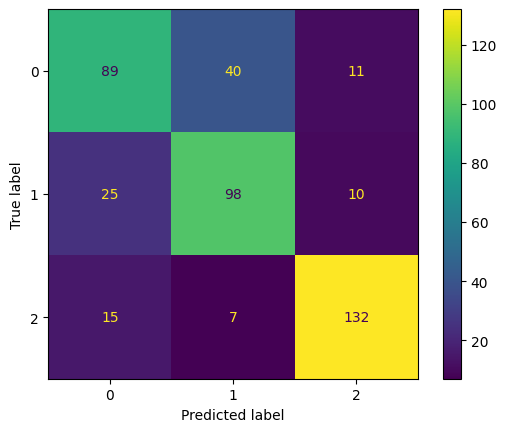

In [18]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#AUC_fig=ROCAUC(model_best,test_data_nolab, test_data[label],classes=["No acvtivity","Activity"])
#RocCurveDisplay.from_predictions(y_test, model_pred)
cm=confusion_matrix(y_test,model_pred)
cm_display=ConfusionMatrixDisplay(cm).plot()

In [19]:
y_probas=predictor.predict_proba(test_data_nolab)

C:\Users\harel\PycharmProjects\Anti_Cp\venv38\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


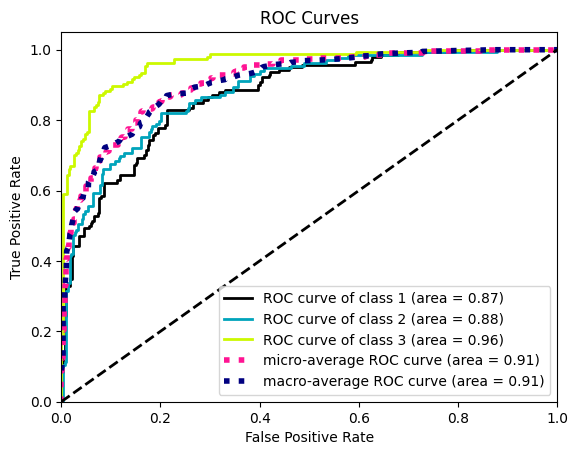

In [21]:
#AUC-figure1
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_roc_curve(y_test,y_probas)

plt.savefig("fig2.pdf")
plt.show()

In [22]:
pd.set_option('max_row',10)
importance=pd.DataFrame(predictor.feature_importance(test_data))
importance

OptionError: 'Pattern matched multiple keys'

In [23]:
importance.to_csv('importance.csv',sep=',',index=True,header=True)

NameError: name 'importance' is not defined

In [ ]:
res_leaderboard.to_csv('res_leaderboard.csv',sep=',',index=True,header=True)